# EDA

In [2]:
!pip install wordcloud

     -------------------------------------- 300.0/300.0 KB 3.1 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\pdkud\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [49]:

import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [4]:
# Диалоги в csv разделены пустой строкой
data = pd.read_csv('simpsons_dataset.csv')
data.head(10)

,raw_character_text,spoken_words
0,Miss Hoover,"No, actually, it was a little of both. Sometim..."
1,Lisa Simpson,Where's Mr. Bergstrom?
2,Miss Hoover,I don't know. Although I'd sure like to talk t...
3,Lisa Simpson,That life is worth living.
4,Edna Krabappel-Flanders,The polls will be open from now until the end ...
5,Martin Prince,I don't think there's anything left to say.
6,Edna Krabappel-Flanders,Bart?
7,Bart Simpson,Victory party under the slide!
8,NaN,NaN
9,Lisa Simpson,Mr. Bergstrom! Mr. Bergstrom!


In [53]:
# Посчитаем количество реплик на одного персонажа
data[~data['spoken_words'].isna()].groupby('raw_character_text').count().sort_values(by= 'spoken_words', ascending=False).head(5)

,spoken_words
raw_character_text,
Homer Simpson,27850
Marge Simpson,13172
Bart Simpson,12995
Lisa Simpson,10756
C. Montgomery Burns,3077


## Построим облако слов Гомера

In [54]:
homer_data = data[(data['raw_character_text']=='Homer Simpson') & (~data['spoken_words'].isna())]

In [55]:
homer_text = " ".join([str(phrase) for phrase in homer_data.spoken_words]).lower()
homer_mask = np.array(Image.open("homer_mask.png"))

In [57]:
stopwords = set(STOPWORDS)
stopwords.update(["marge", "bart", "lisa"])

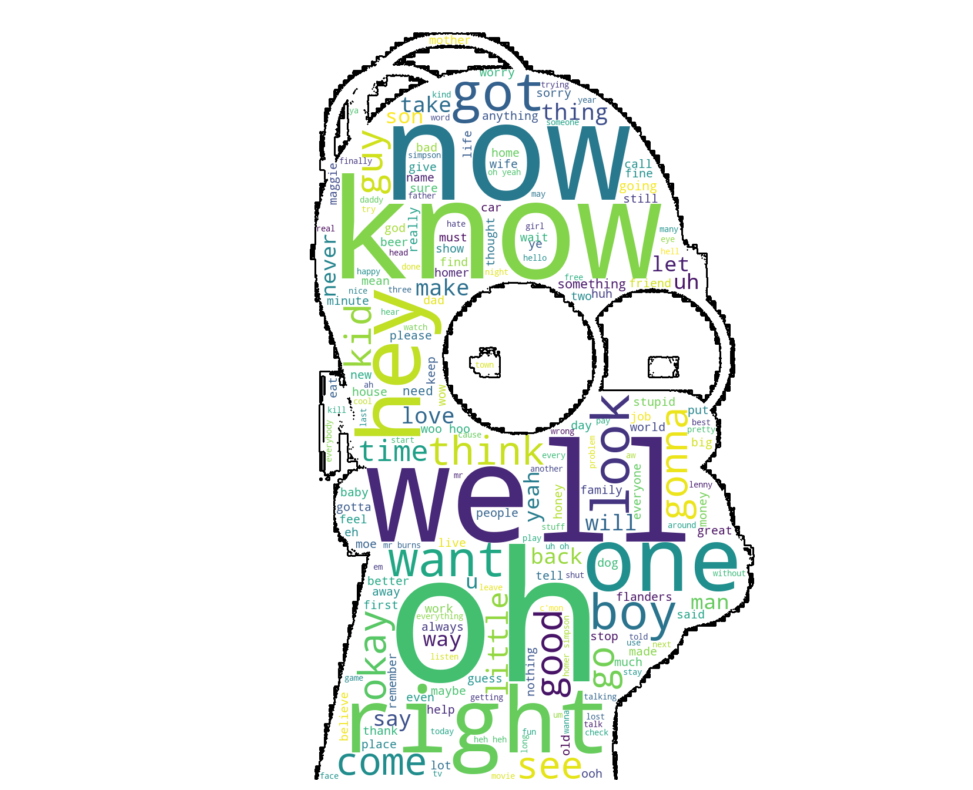

In [58]:
wordcloud = WordCloud(
    #max_font_size=50,
    max_words=200,
    stopwords=stopwords,
    background_color="white",
    mask=homer_mask,
    contour_width=2,
    contour_color="black")

wordcloud.generate(homer_text)

plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()